In [286]:
%store -r y
%store -r x
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [226]:
#Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y['label_binary'], test_size=0.2, 
                                                    random_state=23, stratify=y['label_binary'])
#Scale data
sc = StandardScaler()
#Fit & transform data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [227]:
#Create LogisticRegression model
log_r = LogisticRegression(solver='newton-cg')
log_r.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

[[270   7]
 [ 29  14]]


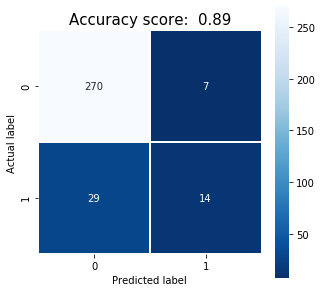

In [228]:
#Testing the model using confusion matrix
predictions = log_r.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
#Plot heatmap to show confusion matrix
score = log_r.score(X_test, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

In [233]:
#linear svc
lin_svc = LinearSVC(max_iter=1000)
lin_svc.fit(X_train, y_train)

C:\Users\lukeb\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

[[275   2]
 [ 32  11]]


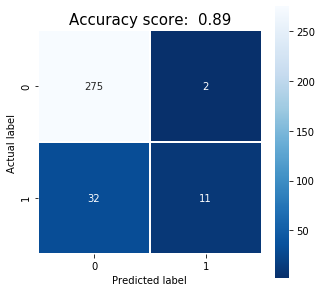

In [265]:
#Testing the svm model using confusion matrix
predictions_lin_svc = lin_svc.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions_lin_svc)
#Plot heatmap to show confusion matrix
score = lin_svc.score(X_test, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

In [263]:
#SVC with rbf kernel
svc = SVC(kernel='rbf', C=6, gamma=0.2)
svc.fit(X_train, y_train)


SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[271   6]
 [ 20  23]]


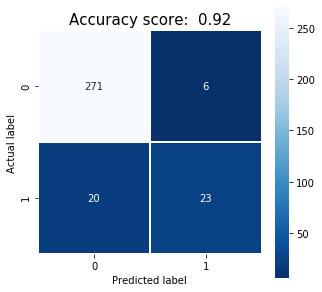

In [262]:
#Testing the svm model using confusion matrix
predictions_svc = svc.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions_svc)
#Plot heatmap to show confusion matrix
score = svc.score(X_test, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

In [284]:
#Grid Search with Cross-Validation
#Using a wide range of C and gamma values to try to locate approximate values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.score(X_test, y_test)}")
print(f"Best estimator: {grid_search.best_estimator_}")

Best Parameters: {'C': 1, 'gamma': 1}
Best Score: 0.896875
Best estimator: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


Text(83.40000000000006, 0.5, 'C')

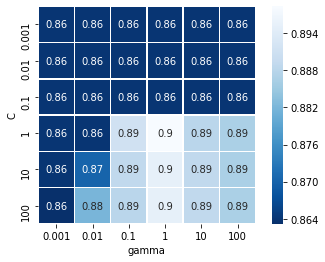

In [297]:
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
plt.figure()
sns.heatmap(scores, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='.2',
           xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('gamma')
plt.ylabel('C')


Here we can see that the optimal values for gamma lies between 0.1 and 10. The optimal value for C is above 1. Running GridSeachCV again with narrowed down parameters might reveal a model that generalises better.

Best Parameters: {'C': 100, 'gamma': 0.7}
Best Score: 0.903125
Best estimator: SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Text(159.0, 0.5, 'C')

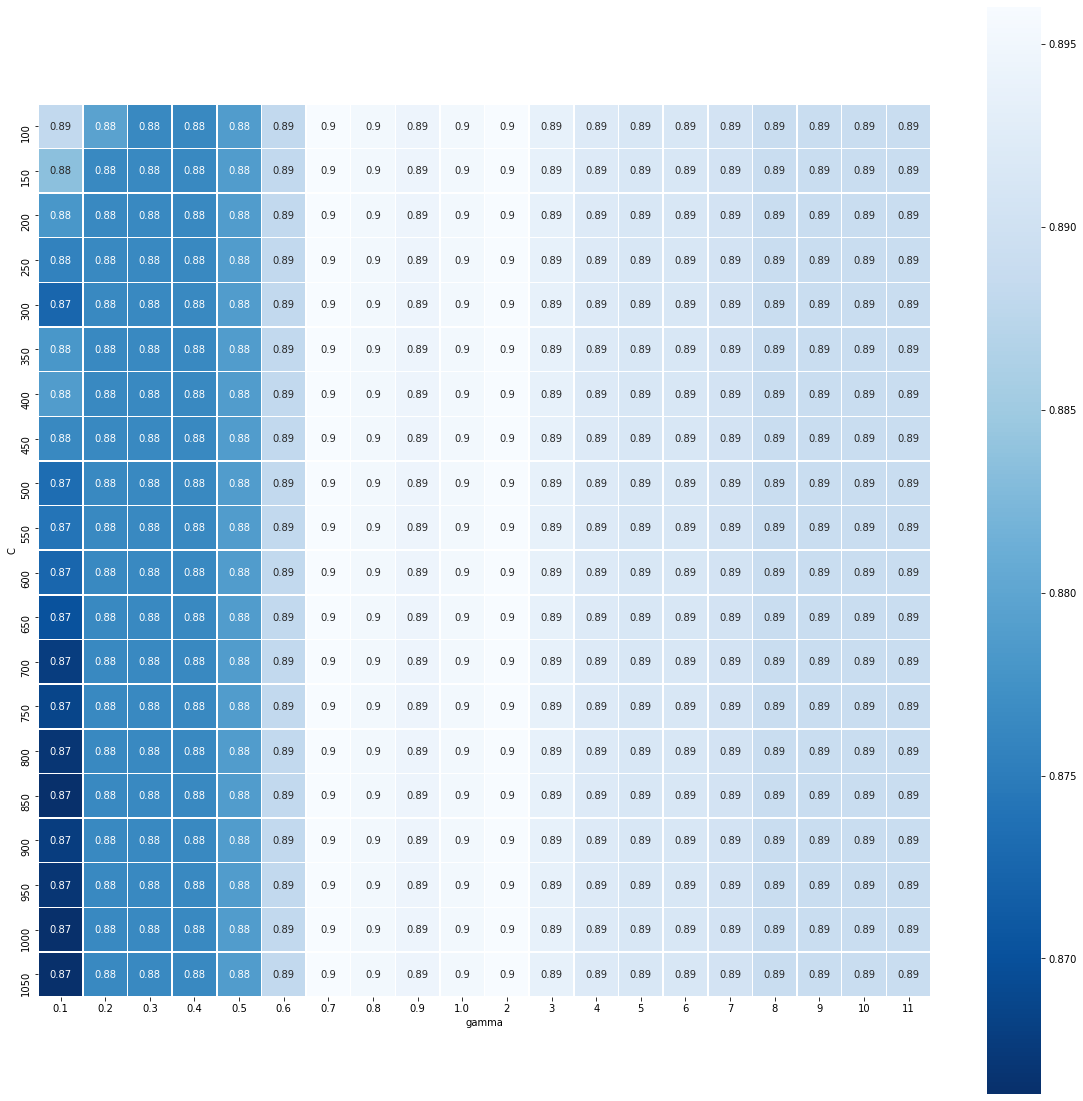

In [304]:
param_grid = {'C': [(x*50)+50 for x in range(1, 21)],
             'gamma': [x/10 for x in range(1,11)]+[x for x in range(2,12)]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.score(X_test, y_test)}")
print(f"Best estimator: {grid_search.best_estimator_}")

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(20, 20)
plt.figure(figsize=(20,20))
sns.heatmap(scores, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='.2',
           xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('gamma')
plt.ylabel('C')

Even expanding the gridsearch and crossvalidation to a larger the accuracy doesn't improve. So it seems that 90% is the best accuracy that can be obtained with this model.

In [266]:
#Random forest Classifier
forest = RandomForestClassifier(n_estimators=1000, max_features=4, max_depth=12)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[269   8]
 [ 21  22]]


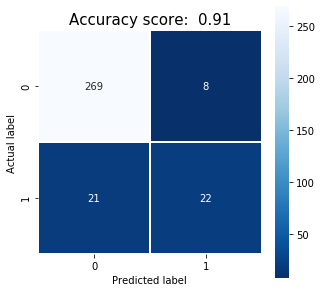

In [173]:
#Testing the random forest classifier model using confusion matrix
predictions_forest = forest.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions_forest)
#Plot heatmap to show confusion matrix
score = forest.score(X_test, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

In [225]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=4, learning_rate=0.09)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

1.0
0.915625


[[268   9]
 [ 21  22]]


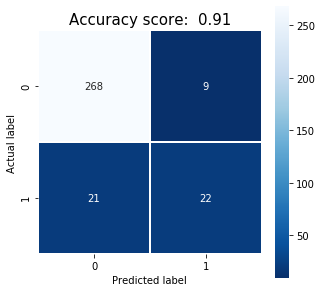

In [191]:
#Testing the random forest classifier model using confusion matrix
predictions_gbc = gbc.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions_gbc)
#Plot heatmap to show confusion matrix
score = gbc.score(X_test, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

In [ ]:
#Optimise/tune models
#Gridsearch
#Cross validation
+

In [ ]:
#try bayes classifiers on individual qualities and good/bad

In [ ]:
#try ordinal regression